<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/chromVAR_analysis_of_Brg1_floxed_D4_and_Brg1_KO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to run chromVAR analysis to see the change in the chromatin accessibility between control and BRG1 KO in EBs.

By Nikita Dsouza

In [1]:
start_time0 <- Sys.time()

# Installing external packages 

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

# Installing R packages 

In [3]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 'GenomicRanges'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel',
  'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'GenomicRanges'

also installing the dependencies ‘pracma’, ‘AnnotationDbi’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘rj

pillar    (1.6.2  -> 1.6.3 ) [CRAN]
stringi   (1.7.4  -> 1.7.5 ) [CRAN]
openssl   (1.4.3  -> 1.4.5 ) [CRAN]
mime      (0.11   -> 0.12  ) [CRAN]
cpp11     (0.3.1  -> 0.4.0 ) [CRAN]
lifecycle (1.0.0  -> 1.0.1 ) [CRAN]
hms       (1.1.0  -> 1.1.1 ) [CRAN]
tibble    (3.1.4  -> 3.1.5 ) [CRAN]
digest    (0.6.27 -> 0.6.28) [CRAN]
readr     (2.0.1  -> 2.0.2 ) [CRAN]


Installing 10 packages: pillar, stringi, openssl, mime, cpp11, lifecycle, hms, tibble, digest, readr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpnAMF2Q/remotes40751274db/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.13) [CRAN]
foreach    (NA -> 1.5.1 ) [CRAN]
doParallel (NA -> 1.0.16) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpnAMF2Q/remotes406c9e3cec/jokergoo-ComplexHeatmap-9c277dd/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.9.4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Load the installed R packages

In [4]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(GenomicRanges)
library(ggplot2)
library(rtracklayer)
library(futile.logger)



Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attac

# Read ATAC seq bed files and generate a Granges object containing the summit information

In [5]:
s3_bed_files <- c(
  'Brg1-floxed_D4_rep1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-1_S13_summits.bed',
  'Brg1-floxed_D4_rep2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-2_S14_summits.bed',
  'Brg1-floxed_4OHT_D4_rep1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-1_S15_summits.bed',
  'Brg1-floxed_4OHT_D4_rep2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-2_S16_summits.bed'

  )


In [6]:
peak_size <- 200L # the ATAC-seq peaks
window_size <- 800L
gr <- lapply(s3_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = peak_size)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 2, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(width = window_size, fix = 'center')
  gr <- gr[!seqnames(gr) %in% c('chrM', 'chrY')]

In [7]:
blacklist_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
blacklist <- blacklist_file %>%
  url() %>%
  gzcon() %>%
  readLines() %>%
  textConnection() %>%
  read.table(header = TRUE, sep = '\t')
blacklist <- GRanges(seqnames = blacklist[, 1], range = IRanges(blacklist[, 2], blacklist[, 3]))

gr <- gr[!gr %over% blacklist]
gr

GRanges object with 25836 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1     3549157-3549956      *
      [2]     chr1     3549339-3550138      *
      [3]     chr1     3671436-3672235      *
      [4]     chr1     3852156-3852955      *
      [5]     chr1     4214067-4214866      *
      ...      ...                 ...    ...
  [25832]     chrX 170018538-170019337      *
  [25833]     chrX 170019722-170020521      *
  [25834]     chrX 170672943-170673742      *
  [25835]     chrX 170757950-170758749      *
  [25836]     chrX 170880730-170881529      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

# Download ATAC seq read counts data file and process the data

In [8]:
s3_bw_files <- c(
  'Brg1-floxed_D4_rep1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-1_S13_treat_pileup.bw',
  'Brg1-floxed_D4_rep2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-2_S14_treat_pileup.bw',
  'Brg1-floxed_4OHT_D4_rep1' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-1_S15_treat_pileup.bw',
  'Brg1-floxed_4OHT_D4_rep2' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-2_S16_treat_pileup.bw'
  
  
  )

In [9]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files)))) 

all s3_bw_files exist: TRUE



In [10]:
X <- do.call('cbind', lapply(s3_bw_files, function(bw_file){
  flog.info(sprintf('reading %s', bw_file))
	ga <- rtracklayer::import(bw_file, format = 'BigWig')#, which = reduce(peaks))	
  cvg <- coverage(ga, weight = as.numeric(mcols(ga)$score))
  sum(cvg[gr])
}))


INFO [2021-10-18 16:13:57] reading ./dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-1_S13_treat_pileup.bw
INFO [2021-10-18 16:14:16] reading ./dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4-2_S14_treat_pileup.bw
INFO [2021-10-18 16:14:24] reading ./dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-1_S15_treat_pileup.bw
INFO [2021-10-18 16:14:34] reading ./dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4-2_S16_treat_pileup.bw


## Process ATAC-seq read counts data

In [11]:
se <- SummarizedExperiment(assays = SimpleList(counts = X), rowRanges = gr, colData = data.frame(group = names(s3_bw_files)))

In [12]:
se <- se[rowSums(assays(se)$counts > 0) >= 2] # remove intervals that have reads in at zero or one condition
se <- addGCBias(se, genome = BSgenome.Mmusculus.UCSC.mm10)
se

class: RangedSummarizedExperiment 
dim: 25836 4 
metadata(0):
assays(1): counts
rownames(25836): chr1 chr1 ... chrX chrX
rowData names(1): bias
colnames(4): Brg1-floxed_D4_rep1 Brg1-floxed_D4_rep2
  Brg1-floxed_4OHT_D4_rep1 Brg1-floxed_4OHT_D4_rep2
colData names(1): group

Adding time and genotype information in colData of the read counts summarized experiment object

In [13]:
colData(se)$time <- gsub('.+?_(.+?)_(D.+?)_.+', '\\2', names(s3_bw_files))
colData(se)$time <- gsub('.+?-(.+?)_(D.+?)_.+', '\\2', colData(se)$time)
colData(se)$time <- gsub('-[0-9]+', '', colData(se)$time)
colData(se)$genotype <- gsub('_D[0-9]+_.+', '\\1', names(s3_bw_files))
colData(se)$is_Brg1_KO <- grepl('_4OHT_', colData(se)$group)
colData(se)$is_dox <- grepl('_Dox_', colData(se)$group)
colData(se)$is_Etv2_KO <- grepl('Null', colData(se)$group)
colData(se)

DataFrame with 4 rows and 6 columns
                                          group        time         genotype
                                    <character> <character>      <character>
Brg1-floxed_D4_rep1         Brg1-floxed_D4_rep1          D4      Brg1-floxed
Brg1-floxed_D4_rep2         Brg1-floxed_D4_rep2          D4      Brg1-floxed
Brg1-floxed_4OHT_D4_rep1 Brg1-floxed_4OHT_D4_..          D4 Brg1-floxed_4OHT
Brg1-floxed_4OHT_D4_rep2 Brg1-floxed_4OHT_D4_..          D4 Brg1-floxed_4OHT
                         is_Brg1_KO    is_dox is_Etv2_KO
                          <logical> <logical>  <logical>
Brg1-floxed_D4_rep1           FALSE     FALSE      FALSE
Brg1-floxed_D4_rep2           FALSE     FALSE      FALSE
Brg1-floxed_4OHT_D4_rep1       TRUE     FALSE      FALSE
Brg1-floxed_4OHT_D4_rep2       TRUE     FALSE      FALSE

# Load motif PWMs to carryout chromVAR analysis for both canonical and partial motif for Etv2

In [14]:
data(homer_pwms)

In [15]:
Etv2_canonical <- homer_pwms[['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']]
Etv2_canonical
Etv2_partial <- reverseComplement(Etv2_canonical)
Etv2_partial@profileMatrix <- Etv2_partial@profileMatrix[, 1:8]
Etv2_partial@ID <- 'Etv2(ETS)/Partial'
Etv2_partial@name <- 'Etv2(ETS)/Partial'
Etv2_partial

An object of class PWMatrix
ID: Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)
Name: Etv2(ETS)
Matrix Class: Unknown
strand: +
Pseudocounts: 
Tags: 
$evidence
[1] "ES-ER71-ChIP-Seq(GSE59402)"

$source
[1] "Homer(0.967)"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
         [,1]       [,2]        [,3]       [,4]        [,5]      [,6]      [,7]
A -0.16016875 -0.3856625  0.60758929 -2.3859667  0.08801088 -5.521461 -5.521461
C  0.18564935  0.1988509 -0.60880603  0.6418539 -5.52146092 -5.521461  1.383290
G  0.02371653 -0.0618754  0.06203539 -0.9571127 -2.74887220 -5.521461 -5.521461
T -0.08338161  0.1484200 -0.58698698  0.4848922  1.04380405  1.383290 -5.521461
       [,8]       [,9]       [,10]      [,11]       [,12]
A -5.521461 -2.4304185 -1.53247687 -0.1544844 -0.46621461
C  1.383290 -2.4304185 -0.03666398  0.1071607  0.09066769
G -5.521461  0.4134333  0.69912925 -0.3787969  0.09431068
T -5.521461  0.8381130 -0.21319322  0.2966507  0.16451494

An object of class PWMatrix
ID: Etv2(ETS)/Partial
Name: Etv2(ETS)/Partial
Matrix Class: Unknown
strand: -
Pseudocounts: 
Tags: 
$evidence
[1] "ES-ER71-ChIP-Seq(GSE59402)"

$source
[1] "Homer(0.967)"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
         [,1]       [,2]        [,3]       [,4]      [,5]      [,6]      [,7]
A  0.16451494  0.2966507 -0.21319322  0.8381130 -5.521461 -5.521461  1.383290
C  0.09431068 -0.3787969  0.69912925  0.4134333 -5.521461 -5.521461 -5.521461
G  0.09066769  0.1071607 -0.03666398 -2.4304185  1.383290  1.383290 -5.521461
T -0.46621461 -0.1544844 -1.53247687 -2.4304185 -5.521461 -5.521461 -5.521461
         [,8]
A  1.04380405
C -2.74887220
G -5.52146092
T  0.08801088

In [16]:
Etv2_partial <- as(list(Etv2_partial), 'SimpleList')
names(Etv2_partial) <- 'Etv2_partial'

In [17]:
homer_pwms <- c(Etv2_partial, homer_pwms)

#chromVar Analysis

In [18]:
motif_ix <- matchMotifs(homer_pwms, se, genome = BSgenome.Mmusculus.UCSC.mm10)

In [19]:
dev <- computeDeviations(object = se, annotations = motif_ix)
v <- computeVariability(dev)

# Calculate the PCs of the motif deviations

In [20]:
set.seed(1)
m <- v$p_value_adj < 1e-25
message(sprintf('there are %d/%d significant motifs', sum(m), length(homer_pwms)))
pc <- prcomp(assays(dev)$z[m, ])
eigs <- pc$sdev^2

there are 100/333 significant motifs



## PCA plot of the motif deviations

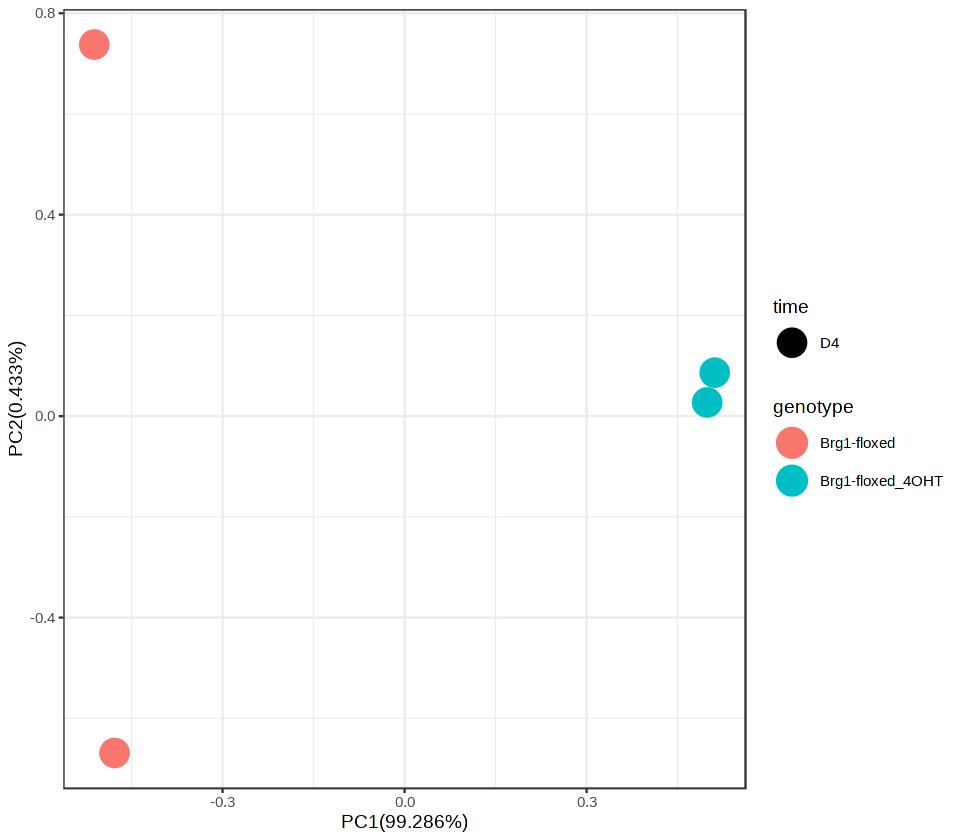

In [21]:
pc_x <- 1
pc_y <- 2
options(repr.plot.width=8, repr.plot.height=7)
data.frame(
  x = pc$rotation[, pc_x],
  y = pc$rotation[, pc_y], 
  time = colData(se)$time,
  genotype = colData(se)$genotype
) %>%
  ggplot(aes(x = x, y = y)) +
    geom_point(aes(col = genotype, shape = time),size = 8) +
    xlab(sprintf('PC%d(%.3f%%)', pc_x, eigs[pc_x] / sum(eigs) * 100)) +
    ylab(sprintf('PC%d(%.3f%%)', pc_y, eigs[pc_y] / sum(eigs) * 100)) + theme_bw()

The BRG1 floxed 4OHT replicate are clustered together thus showing high similarity between them.

# Complex heatmap using z-scores calculated above to display chromatin accessibility

In [22]:
m <- v$p_value_adj < 1e-10
cat(sprintf('# of significant motifs: %d(%d)\n', sum(m), length(m)))
Y <- assays(dev)$z
rownames(Y) <- rowData(dev)$name
Y <- Y[m, ]

# of significant motifs: 192(333)


## Color annotation

In [23]:
col_fun <- colorRamp2(quantile(Y, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

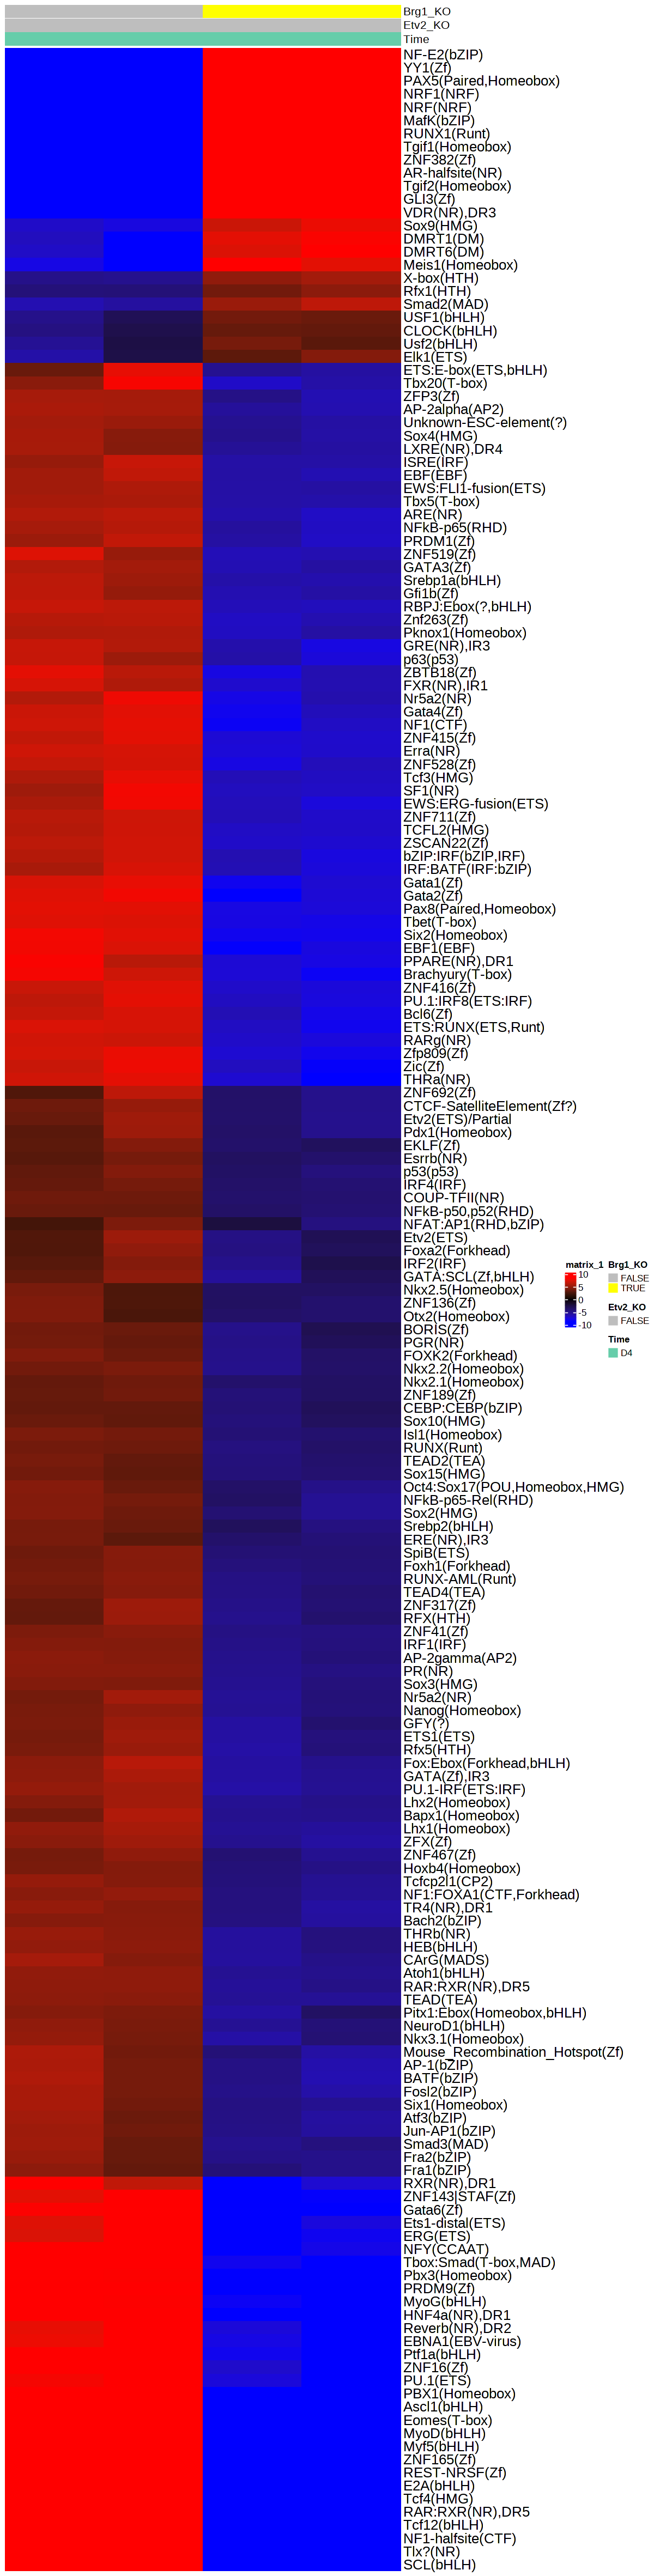

In [24]:
column_annotation <- HeatmapAnnotation(
  Brg1_KO = colData(se)$is_Brg1_KO,
  Etv2_KO = colData(se)$is_Etv2_KO,
  Time = colData(se)$time,
  col = list(
    Brg1_KO  = c('TRUE' = 'yellow', 'FALSE' = 'gray'),
    Etv2_KO = c('TRUE' = 'green', 'FALSE' = 'gray'),
    Time = c("D3" = "aquamarine2", "D4" = "aquamarine3")
    )
)


options(repr.plot.width=10, repr.plot.height = nrow(Y) * 0.2 + 1)
Heatmap(
  Y,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)
)

# Highlighting select names in the heatmap 

In [25]:
highlights <- c(
  'Etv2(ETS)/Partial',
  'AP-1(bZIP)',
  'Atf3(bZIP)',
  'Bach1(bZIP)',
#  'Bach2(bZIP)',
  'BATF(bZIP)',
#  'EHF(ETS)',
#  'ELF5(ETS)',
#  'Elk1(ETS)',
#  'Elk4(ETS)',
  'ERG(ETS)',
  'ETS1(ETS)',
#  'Ets1-distal(ETS)',
#  'ETS:E-box(ETS,bHLH)',
  'ETS(ETS)',
  'ETS:RUNX(ETS,Runt)',
  'ETV1(ETS)',
  'Etv2(ETS)',
#  'EWS:ERG-fusion(ETS)',
#  'EWS:FLI1-fusion(ETS)',
#  'Fli1(ETS)',
  'Fosl2(bZIP)',
  'Foxo1(Forkhead)',
  'Fra1(bZIP)',
  'Fra2(bZIP)',
  'GABPA(ETS)',
  'Jun-AP1(bZIP)',
#  'KLF14(Zf)',
  'KLF3(Zf)',
#  'Klf4(Zf)',
#  'KLF5(Zf)',
#  'Klf9(Zf)',
  'Maz(Zf)',
  'Meis1(Homeobox)',
  'NF-E2(bZIP)',
  'NFY(CCAAT)',
  'Nrf2(bZIP)',
  'PBX1(Homeobox)',
  'PU.1(ETS)',
  'RUNX(Runt)',
  'Sp1(Zf)',
  'SPDEF(ETS)',
  'SpiB(ETS)',
#  'TEAD2(TEA)',
  'TEAD4(TEA)',
  'VDR(NR),DR3',
  'YY1(Zf)',
  'ETS:E-box(ETS,bHLH)',
  'Foxh1(Forkhead)',
  'EWS:ERG-fusion(ETS)',
  'Ets2-distal(ETS)',
  'Lhx1(Homeobox)',
  'Lhx2(Homeobox)',
  'ETS:RUNX(ETS,Runt)',
  'EWS:FLI1-fusion(ETS)',
  'SpiB(ETS)',
  'Nkx2.5(Homeobox)',
  'Tcf12(bHLH)',
  'SCL(bHLH)',
  'GATA:SCL(Zf,bHLH)',
  'MyoD(bHLH)',
  'Gata4(Zf)',
  'GATA3(Zf)',
  'GATA:SCL(Zf,bHLH)',
  'Isl1(Homeobox)',
  'RAR:RXR(NR),DR5'

)

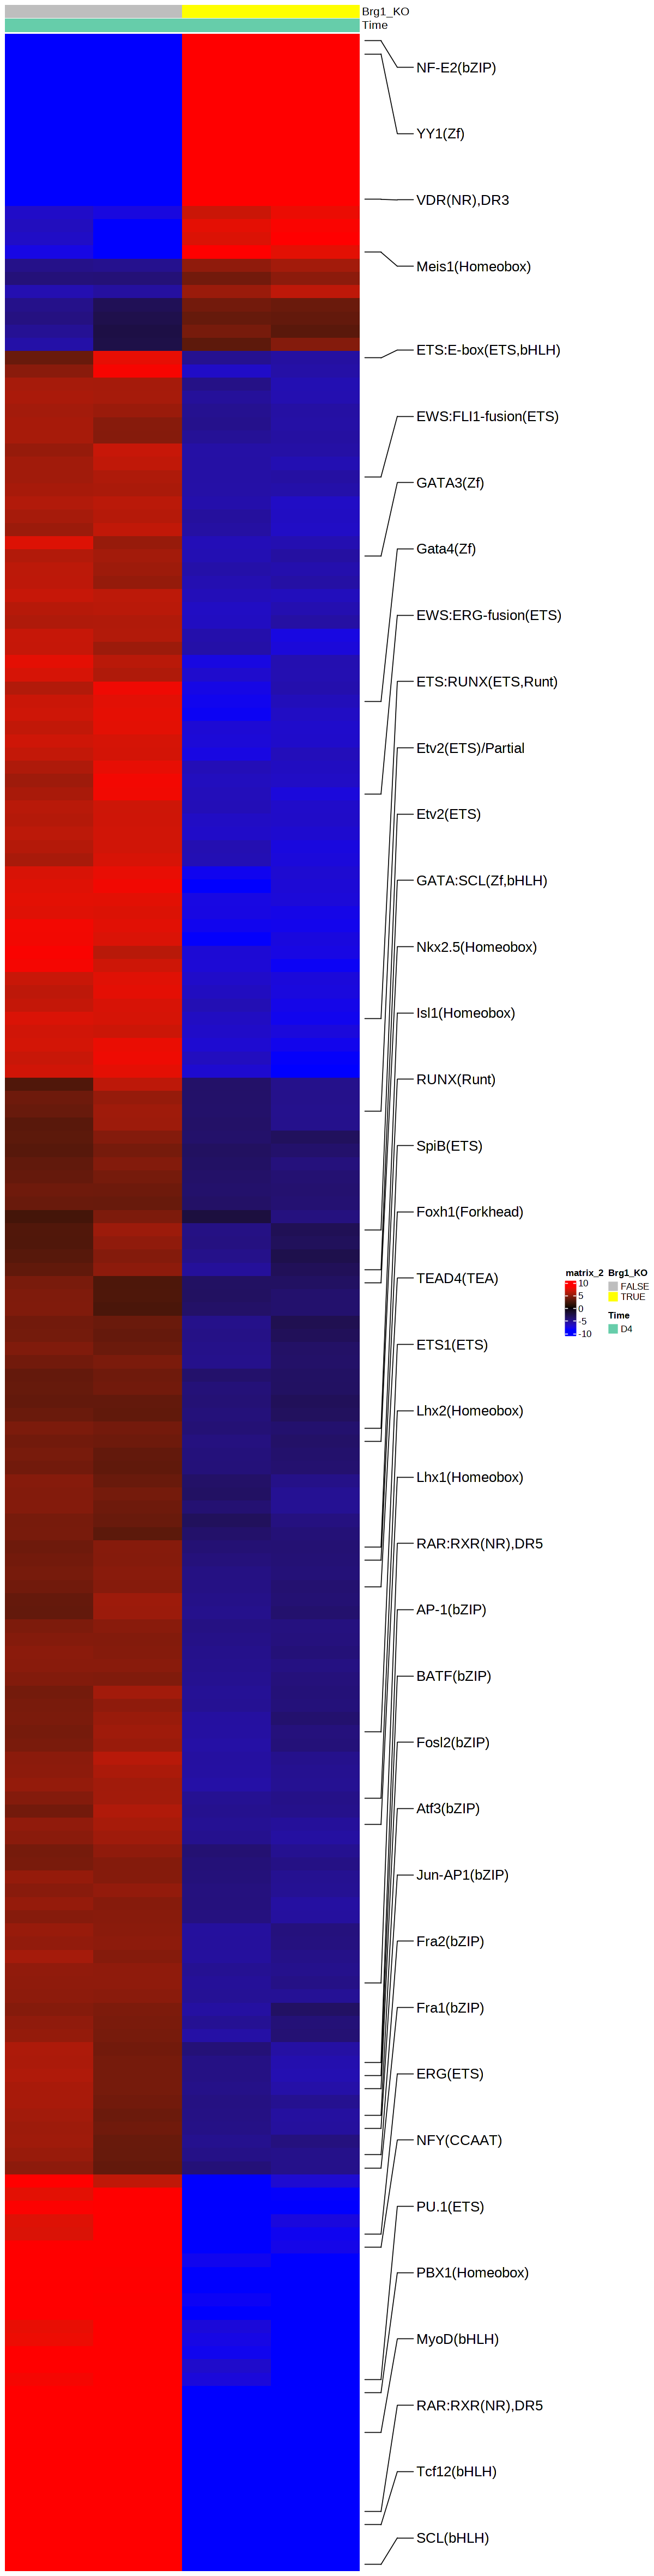

In [26]:
column_annotation <- HeatmapAnnotation(
  Brg1_KO = colData(se)$is_Brg1_KO,
  Time = colData(se)$time,
  col = list(
    Brg1_KO  = c('TRUE' = 'yellow', 'FALSE' = 'gray'),
    Etv2_KO = c('TRUE' = 'green', 'FALSE' = 'gray'),
    Time = c("D3" = "aquamarine2", "D4" = "aquamarine3")
    )
)


options(repr.plot.width=10, repr.plot.height = nrow(Y) * 0.2 + 1)
Heatmap(
  Y,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)
)+ 
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(Y) %in% highlights), 
      labels = rownames(Y)[rownames(Y) %in% highlights], 
      labels_gp = gpar(fontsize = 15), 
      link_width = unit(20, "mm"),
      padding = unit(0.5, "mm"), 
      which = 'row'
    ) 
  )

The Heatmap shows labelled ETS factors that have a decrease in chromatin accessibilty in the Brg1 KO sample compared to the control in EBs. We also have a few more TF highlightedthat shows the change in chromatin accesibility for Brg1 control vs Brg1 KO.

In [27]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] futile.logger_1.4.3                ggplot2_3.3.5                     
 [3] dplyr_1.0.7                        plyr_1.8.6                        
 [5] ComplexHeatmap_2.9.4               circlize_0.4.13                   
 [7] gplo